In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
np.random.seed(1)

In [2]:
X = np.array([[2.6, 3.6, 0.1, 0.8, -3.1, 2.4], [-3.4, 4.8, 3.8, -3.5, -1, 3.2]])
Y = np.array([[1, 1, 0, 0, 0, 1]], dtype=float)

Функция активации 

In [3]:
def hardlim(n):
    if n >= 0:
        return 1
    return 0

Объявим класс перспетрон

In [4]:
class Perseptron:
    def __init__(self):
        self.w = None

    def Fit(self, X, Y, n_epoch=20, lr=0.1):
        P = np.ones((1, X.shape[1]))
        P = np.append(P, X, axis=0)
        S = Y.shape[0]
        R = P.shape[0]
        T = Y
        if self.w is None:
            self.w = np.random.rand(S, R)
        for epoch in range(n_epoch):
            for i in range(P.shape[1]):
                n = self.w @ P[:,i]
                a = np.array([hardlim(x) for x in n])
                e = T[:,i] - a
                for j in range(S):
                    self.w[j] = self.w[j] + lr * e[j] * P[:,i].T
    
    def Predict(self, test, n):
        ans = np.zeros((n, test.shape[1]))
        
        P = np.ones((1, test.shape[1]))
        P = np.append(P, test, axis=0)
        
        for i in range(P.shape[1]):
            n = self.w @ P[:,i]
            a = np.array([hardlim(x) for x in n])
            
            for j in range(a.shape[0]):
                ans[j][i] = a[j]
        return ans





Функция отображает обучающую выборку и дискриминантную линию

In [5]:
def OneLayerPlt(X, Y, w, test=None):
    plt.figure(figsize=(12, 6))
    plt.ylim([-5,5])
    plt.xlim([-5,5])
    x1 = np.linspace(-5, 5, 100)
    x2 = - x1 * w[0][1] / w[0][2] - w[0][0] / w[0][2]
    plt.plot(x1, x2, 'b')

    g_patch = mpatches.Patch(color='g', label='0')
    r_patch = mpatches.Patch(color='r', label='1')
    for i in range(X.shape[1]):
        if Y[0][i] == 1:
            plt.plot(X[0][i], X[1][i], 'or')
        else:
            plt.plot(X[0][i], X[1][i], 'og')
    if test is not None:
        for i in range(test.shape[1]):
            plt.plot(test[0][i], test[1][i], 'oy')

    plt.legend(handles=[r_patch, g_patch])
    plt.grid()
    plt.show()

Модель со случайными весами:

In [6]:
net = Perseptron()
net.Fit(X, Y, n_epoch=0)
w = net.w
w


array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04]])

График

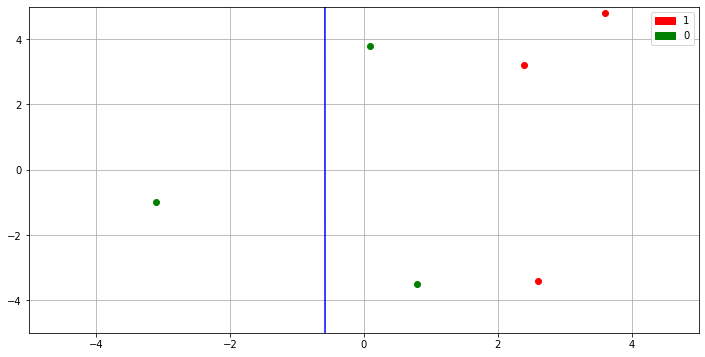

In [7]:
OneLayerPlt(X, Y, w)

Модель после обучения на 50-ти epoch

In [8]:
net = Perseptron()
net.Fit(X, Y, n_epoch=50)
w = net.w
w

array([[-1.09766743,  0.82675589, -0.11766141]])

График

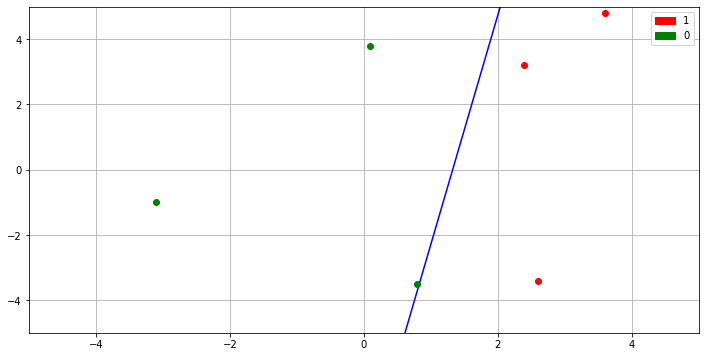

In [9]:
OneLayerPlt(X, Y, w)

Проверим модель на тестовой выборке

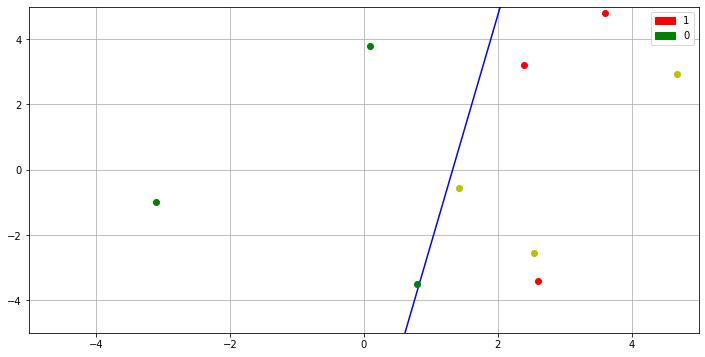

array([[1., 1., 1.]])

In [10]:
test = np.array([np.random.randint(-5, 5, 3) + np.random.random(3),
 np.random.randint(-5, 5, 3) + np.random.random(3)])
test
OneLayerPlt(X, Y, w, test)
net.Predict(test, 1)

Сделаем выборку линейно-неразделимой

In [11]:
X = np.hstack((X, [[0], [0]]))
Y = np.hstack((Y, [[1]]))
print(X, Y, sep='\n')

[[ 2.6  3.6  0.1  0.8 -3.1  2.4  0. ]
 [-3.4  4.8  3.8 -3.5 -1.   3.2  0. ]]
[[1. 1. 0. 0. 0. 1. 1.]]


In [12]:
net = Perseptron()
net.Fit(X, Y, n_epoch=50)
w = net.w
w

array([[-0.42161076,  0.26597052,  0.0527575 ]])

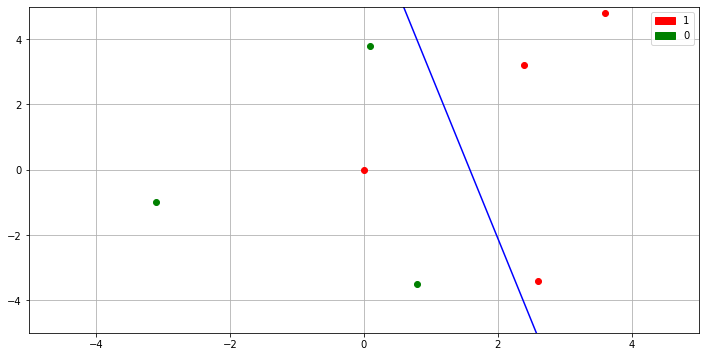

In [13]:
OneLayerPlt(X, Y, w)

Разделение на 4 класса

In [14]:
X_2 = np.array([[-1.6, 2.9, 1.8, -4.5, -4.6, 2.2, 3.7, -4.3],
                [2.3, 0.4, 3.9, -2.0, -3.1, 2.2, 0.8, 4.2]])

Y_2 = np.array([[0, 1, 1, 0, 0, 1, 1, 0],
                [0, 1, 0, 1, 1, 1, 1, 0]])


In [15]:
def MultyLayerPlt(X, Y, w, test=None):
    plt.figure(figsize=(12,6))
    plt.ylim([-7, 7])
    plt.xlim([-7, 7])
    for i in range(w.shape[0]):
        x1 = np.linspace(-5, 5, 100)
        x2 = - x1 * w[i][1] / w[i][2] - w[i][0] / w[i][2]
        plt.plot(x1, x2, 'b')
    
    g_patch = mpatches.Patch(color='g', label='00')
    r_patch = mpatches.Patch(color='r', label='01')
    c_patch = mpatches.Patch(color='c', label='10')
    m_patch = mpatches.Patch(color='m', label='11')

    for i in range(X.shape[1]):
        if Y[0][i] == 0 and Y[1][i] == 0:
            plt.plot(X[0][i], X[1][i], 'og')
        elif Y[0][i] == 0 and Y[1][i] == 1:
            plt.plot(X[0][i], X[1][i], 'or')
        elif Y[0][i] == 1 and Y[1][i] == 0:
            plt.plot(X[0][i], X[1][i], 'oc')
        else:
            plt.plot(X[0][i], X[1][i], 'om')
    if test is not None:
        for i in range(test.shape[1]):
            plt.plot(test[0][i], test[1][i], 'ok')
    
    
    plt.legend(handles=[r_patch, g_patch, c_patch, m_patch])
    plt.grid()
    plt.show()
    

Модель со случайными весами

In [16]:
net2 = Perseptron()
net2.Fit(X_2, Y_2, n_epoch=0)
w_2 = net2.w
w_2

array([[0.09280081, 0.51815255, 0.86502025],
       [0.82914691, 0.82960336, 0.27304997]])

График

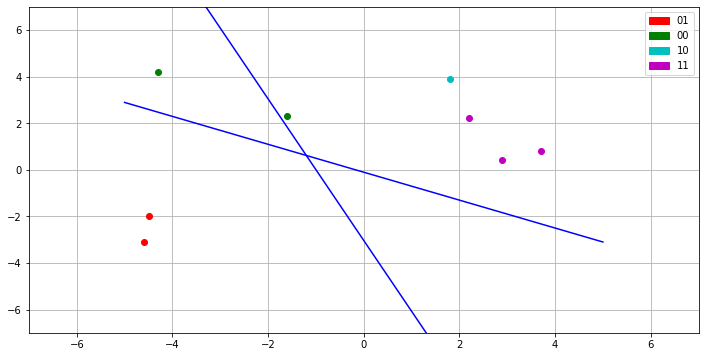

In [17]:
MultyLayerPlt(X_2, Y_2, w_2)

Модель после обучения на 50-ти epoch

In [18]:
net2 = Perseptron()
net2.Fit(X_2, Y_2, n_epoch=50)
w_2 = net2.w
w_2

array([[-0.0407568 ,  0.83052804,  0.36306552],
       [ 0.6716541 ,  0.16178788, -0.4024491 ]])

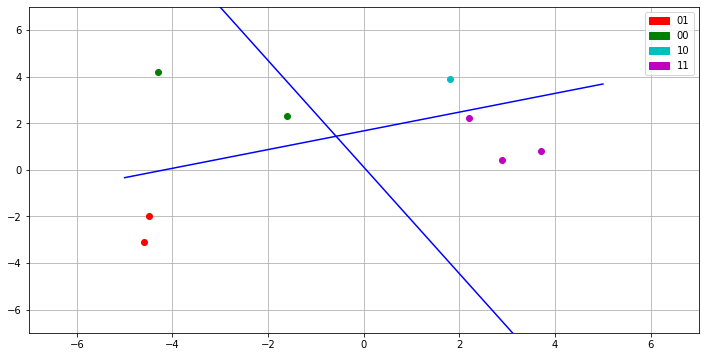

In [19]:
MultyLayerPlt(X_2, Y_2, w_2)

Проверим модель на тестовой выборке

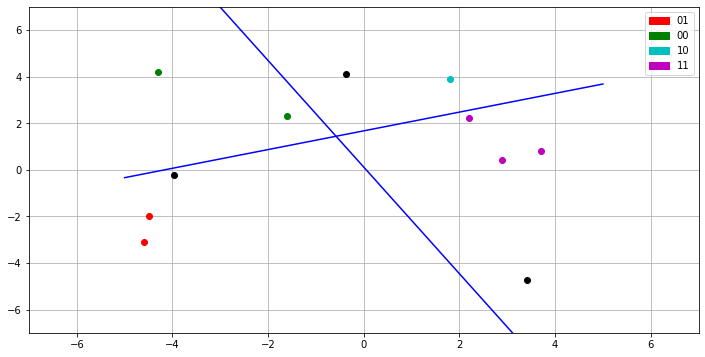

[[1. 0. 1.]
 [1. 1. 0.]]


In [20]:
test_2 = np.array([np.random.randint(-5, 5, 3) + np.random.random(3),np.random.randint(-5, 5, 3) + np.random.random(3)])
MultyLayerPlt(X_2, Y_2, w_2, test_2)
a = net2.Predict(test_2,2)
print(a)